In [1]:
## importing necessary libraries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## to avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing dataset
data = pd.read_csv(r'XYZCorp_LendingData.txt', sep = '\t',low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
## to read all the columns
pd.set_option('display.max_columns',None)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.shape

(855969, 73)

In [4]:
## making copy
data_cp = data.copy()

## checking missing values

In [8]:
#function to find missing Value
total = data.isnull().sum().sort_values(ascending=False)  # capturing the highest missing variable total in desc order
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)  # calculating percentage of NAs
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']) # concatenating total and percent variables
missing_data.head(50)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


In [41]:
#checking the number of unique values in the dataset
data.nunique()

id                            855969
member_id                     855969
loan_amnt                       1368
funded_amnt                     1368
funded_amnt_inv                 8818
term                               2
int_rate                         520
installment                    67349
grade                              7
sub_grade                         35
emp_title                     290912
emp_length                        11
home_ownership                     6
annual_inc                     48163
verification_status                3
issue_d                          103
pymnt_plan                         2
purpose                           14
title                          60991
zip_code                         931
addr_state                        51
dti                             4074
delinq_2yrs                       29
earliest_cr_line                 697
inq_last_6mths                     9
open_acc                          77
pub_rec                           31
r

After having a closer look at the data (and studying frequency tables), we can remove the following variables, reasons described:

1. policy_code is always == 1
2. payment_plan has only 10 y and 887372 n
3. id and member_id are all unique, which is a bit misleading. So every record is a unique customer
4. application_type is 'INDIVIDUAL' for 99.94% of the records
5. acc_now_delinq is 0 for 99.5% of the records
6. emp_title not needed here, because it's a categorical varibale with (290912 level)
7. zip_code not needed for this level of analysis,
8. title can be removed as well because it's a categorical varibale with (61000 level).
9. earliest_cr_line variable because it's a date varibale with (697 level)
10. addr_state variable has 51 level
11. next_pymnt_d variable because it's a date varibale with (3 level) and it contains 29% Missing info.
12. last_pymnt_d variable because it's a date varibale with (51 level)
13. last_credit_pull_d variable because it's a date varibale with (102 level)
14. sub_grade because it has 35 levels

# Feature Selection

In [42]:
#Removing the irrelevant variable
var_removed = ['policy_code', 'pymnt_plan', 'id', 'member_id', 'application_type', 
                      'acc_now_delinq','emp_title', 'zip_code','title','earliest_cr_line','addr_state',
               'next_pymnt_d','sub_grade','last_pymnt_d','last_credit_pull_d']

data.drop( var_removed , axis = 1, inplace = True )

In [45]:
#checking for total numbers of rows and columns in datasets
data.shape

(855969, 39)

In [132]:
data.nunique()

id                            855969
member_id                     855969
loan_amnt                       1368
funded_amnt                     1368
funded_amnt_inv                 8818
term                               2
int_rate                         520
installment                    67349
grade                              7
sub_grade                         35
emp_title                     290912
emp_length                        11
home_ownership                     6
annual_inc                     48163
verification_status                3
issue_d                          103
pymnt_plan                         2
purpose                           14
title                          60991
zip_code                         931
addr_state                        51
dti                             4074
delinq_2yrs                       29
earliest_cr_line                 697
inq_last_6mths                     9
open_acc                          77
pub_rec                           31
r

In [44]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0,Dec,2011
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,1,Dec,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0,Dec,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-2011,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0,Dec,2011
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-2011,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0,Dec,2011


In [134]:
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

In [46]:
total = data.isnull().sum().sort_values(ascending=False)  # capturing the highest missing variable total in desc order
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)  # calculating percentage of NAs
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']) # concatenating total and percent variables
missing_data.head(55)

,Total,Percent
total_rev_hi_lim,67313,7.863953
tot_cur_bal,67313,7.863953
tot_coll_amt,67313,7.863953
emp_length,43061,5.030673
revol_util,446,0.052105
collections_12_mths_ex_med,56,0.006542
home_ownership,0,0.000000
delinq_2yrs,0,0.000000
dti,0,0.000000
purpose,0,0.000000


In [ ]:
# Imputing missing data for categorical variable with mode value

colname1=['term','emp_length','verification_status','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d']
for x in colname1[:]:
     data[x].fillna(data[x].mode()[0],inplace=True)
    
data.isnull().sum()

In [ ]:
# Imputing missing data for Numerical with mean value / Zeros 
#data['annual_inc_joint'].fillna(0,inplace=True)

colname2=['mths_since_last_delinq','revol_util','collections_12_mths_ex_med',
          'total_rev_hi_lim']
for x in colname2[:]:
    data[x].fillna(data[x].mean(),inplace=True)
    
data.isnull().sum()
data.shape  

<AxesSubplot:>

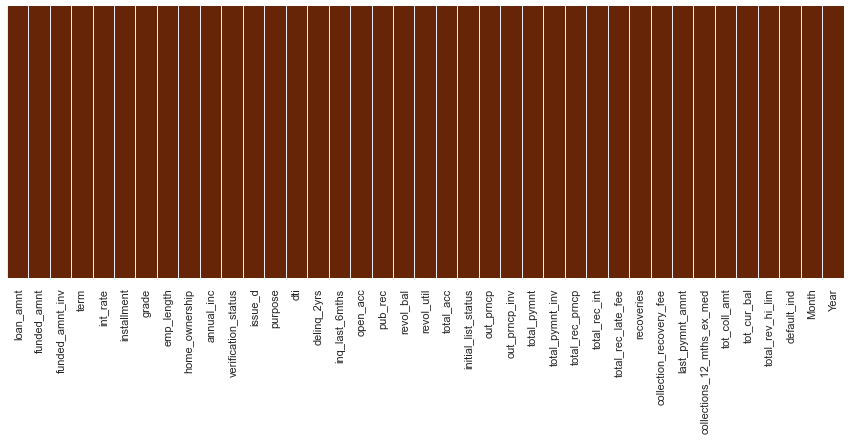

In [50]:
# Visualising the missing values in each column after dropping the variables

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="YlOrBr_r" )


In [51]:
#To check the description of all the variables
data.describe(include="all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Month,Year
count,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,855969,8.559690e+05,855969,855969,855969,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,8.559690e+05,8.559690e+05,855969.000000,855969,855969
unique,NaN,NaN,NaN,2,NaN,NaN,7,11,6,NaN,3,103,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9
top,NaN,NaN,NaN,36 months,NaN,NaN,B,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct,2015
freq,NaN,NaN,NaN,600221,NaN,NaN,247998,325151,429106,NaN,318178,48212,505392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109565,403697
mean,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,NaN,7.507119e+04,NaN,NaN,NaN,18.122165,0.311621,0.680915,11.542447,0.194537,1.691053e+04,55.019863,25.269269,NaN,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014229,2.076865e+02,1.351456e+05,3.150587e+04,0.054286,NaN,NaN
std,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,NaN,6.426447e+04,NaN,NaN,NaN,17.423629,0.857189,0.964033,5.308094,0.581585,2.222374e+04,23.805389,11.818841,NaN,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133707,1.006874e+04,1.486058e+05,3.625691e+04,0.226581,NaN,NaN
min,500.000000,500.000000,0.000000,NaN,5.320000,15.690000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN
25%,8000.000000,8000.000000,8000.000000,NaN,9.990000,260.550000,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,NaN,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,0.000000e+00,3.225000e+04,1.475000e+04,0.000000,NaN,NaN
50%,13000.000000,13000.000000,13000.000000,NaN,12.990000,382.550000,NaN,NaN,NaN,6.500000e+04,NaN,NaN,NaN,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,NaN,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,0.000000e+00,8.100850e+04,2.380000e+04,0.000000,NaN,NaN
75%,20000.000000,20000.000000,20000.000000,NaN,15.990000,571.560000,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,23.900000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,73.500000,32.000000,NaN,13528.800000,13522.510000,10744.803649,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,0.000000,0.000000e+00,1.963730e+05,3.800000e+04,0.000000,NaN,NaN


# defining the elements in variable "emp_length" into classes 0-10

In [52]:
# To check the counts of unique values
data['emp_length'].value_counts()

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

emp_length has ( 11 level)
Values in Employment length are in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [53]:
#Defining the emp_length ariables into clases from 0-10
data['emp_length'] = data['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10})

In [54]:
# cross checking the counts of unique values
data['emp_length'].value_counts()

10    325151
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

# defining the elements in variable "term" into classes

In [55]:
# To check the counts of unique values
data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

term has(2 level)
It is number of payments on the loan. Values are in months and are defined into 36 or 60.

In [56]:
#Defining the elemnets of term variables into clases as 1 and 2 based on the values 
data['term'] = data['term'].replace({'36 months':1,'60 months':2},regex = True)

In [57]:
#cross checking the counts of unique values
data['term'].value_counts()

1    600221
2    255748
Name: term, dtype: int64

# defining the elements in variable "initial_list_status"

In [58]:
# To check the counts of unique values
data['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

initial_list_status has (2 level)
Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [59]:
#Maping the elemnets of initial_list_status variables
data['initial_list_status'] = data['initial_list_status'].map({'f':1,'w':2})

In [60]:
#cross checking the counts of unique values
data['initial_list_status'].value_counts()

1    442555
2    413414
Name: initial_list_status, dtype: int64

# defining the elements in variable verification_status

In [61]:
# To check the counts of unique values
data['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

verification_status has (3 level), Was the income source verified

In [62]:
#Maping the elemnets of verification_status variables
data['verification_status'] = data['verification_status'].map({'Source Verified':1,'Verified':2, 'Not Verified':3})

In [63]:
#cross checking the counts of unique values
data['verification_status'].value_counts()

1    318178
2    280049
3    257742
Name: verification_status, dtype: int64

# defining the elements in variable home_ownership

In [64]:
# To check the counts of unique values
data['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

home_ownership has (6 level)
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [65]:
#Maping the elemnets of verification_status variables
data['home_ownership'] = data['home_ownership'].map({'MORTGAGE':1,'RENT':2,'OWN':3,'OTHER':4,'NONE':5,'ANY':6})

In [66]:
#cross checking the counts of unique values
data['home_ownership'].value_counts()

1    429106
2    342535
3     84136
4       144
5        45
6         3
Name: home_ownership, dtype: int64

# defining the elements in variable "grade"

In [67]:
# To check the counts of unique values
data['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

grade has(7 level)
XYZ corp. assigned loan grade

In [68]:
#Maping the elemnets of verification_status variables
data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [69]:
#cross checking the counts of unique values
data['grade'].value_counts()

2    247998
3    236855
1    145665
4    132802
5     66448
6     21328
7      4873
Name: grade, dtype: int64

# defining the elements in variable "purpose"

In [70]:
# To check the counts of unique values
data['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

purpose (14 level)
A category provided by the borrower for the loan request.

In [71]:
#Maping the elemnets of purpose variables
data['purpose'] = data['purpose'].map({'debt_consolidation':1, 'credit_card':2, 
                                       'home_improvement':3, 'other':4, 'major_purchase':5, 
                                       'small_business':6, 'car':7, 'medical':8,
                                       'moving':9, 'vacation':10, 'house':11,'wedding':12,
                                       'renewable_energy':13,'educational':14})

In [72]:
#cross checking the counts of unique values
data['purpose'].value_counts()

1     505392
2     200144
3      49956
4      40949
5      16587
6       9785
7       8593
8       8193
9       5160
10      4542
11      3513
12      2280
13       549
14       326
Name: purpose, dtype: int64

# Method 2

 Label Encoding-converting the categorical variable into numeric form so as to convert it into the machine-readable form

In [ ]:
# Label Encoding - to label all categorical variable value with numeric value
#Label will get assigned in Ascending alphabetical of variable value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d','application_type']

data.head()
from sklearn import preprocessing

le={}

for x in colname1:
     le[x]=preprocessing.LabelEncoder()

for x in colname1:
     data[x]=le[x].fit_transform(data[x])
data.head()

In [80]:
data.to_csv("cleaned_data.csv",header = True)

In [ ]:
#checking the data type of variables
data.dtypes

# Method 1

# Train And Test Split

Data Partition
train --> ( June 2007 – May 2015 )

test --> ( June 2015 – Dec 2015 )

So we have decided to treat the date column(‘issue_d’).First, we will split the column(‘issue_d’) into two different columns and tranfer the values as per requirement into thode columns .After that with the help of map function we will concatinate the columns and make them one with different name (‘period’). Then we have sorted the ‘period’ column as per required column partion and converted it into  an index for slicing according to the requirement.

In [ ]:
data['str_split'] = data.issue_d.str.split('-')

data['month'] = data.str_split.str.get(0)

data['year']=data.str_split.str.get(1)

data['month'] = data['month'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                                  ,regex = True)

data["period"] = data["year"].map(str) + data["month"]

In [ ]:
#sorting the values in period variable   
data = data.sort_values('period')
data.head()

In [ ]:
#converting variable into index
data_index = data.set_index('period')
data_index.head()

In [ ]:
#Droping the irrevelent variables
var_remove=['issue_d','str_split','month','year']
data1=data_index.drop(var_remove,axis=1,inplace=True)
data1.shape

In [ ]:
data1.head()

In [ ]:
#Further splitting the data into train and test

In [ ]:
#Train data

In [4]:
train_data = data1.loc['200706':'201505',:]
train_data.shape

(598978, 36)

In [5]:
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,0,2,22000.0,...,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8,0,150000.0,...,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10,0,125000.0,...,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6,1,40000.0,...,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,0,1,20000.0,...,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0


In [ ]:
#Test data

In [5]:
test_data = data1.loc['201506':'201512',:]
test_data.shape

(256991, 36)

In [12]:
test_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,0,9.17,1115.77,1,1,0,130000.0,...,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0,0
201506,11500.0,11500.0,11475.0,1,9.17,239.68,1,10,1,74000.0,...,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0,0
201506,12000.0,12000.0,12000.0,1,15.61,289.34,3,2,1,48000.0,...,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0,0
201506,35000.0,35000.0,35000.0,0,12.29,1167.36,2,3,0,121000.0,...,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0,0
201506,27000.0,27000.0,27000.0,1,8.18,549.80,1,10,0,100000.0,...,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0,0


In [6]:
""""x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]""

In [ ]:
#spliting into and X_train,X_test and y_train,Y_test for train and test data

In [7]:
# splitting into training and testing
x_train=train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
x_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [11]:
x_train.shape

(598978, 35)

In [12]:
x_test.shape

(256991, 35)

In [13]:
y_train.shape

(598978,)

In [14]:
y_test.shape

(256991,)

# Method 2

In [ ]:
#Splitting the dataset into train and test

In [68]:
#train data
train_data = data1.loc['200706':'201505',:]
train_data.shape
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,0,2,22000.0,...,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8,0,150000.0,...,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10,0,125000.0,...,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6,1,40000.0,...,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,0,1,20000.0,...,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0


In [69]:
#reseting the index column for train data
train_data.reset_index(drop=True,inplace=True) # it will the drop current index column and reset the index numbers to 0

In [70]:
#test data
test_data = data1.loc['201506':'201512',:]
test_data.shape
test_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,0,9.17,1115.77,1,1,0,130000.0,...,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0,0
201506,11500.0,11500.0,11475.0,1,9.17,239.68,1,10,1,74000.0,...,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0,0
201506,12000.0,12000.0,12000.0,1,15.61,289.34,3,2,1,48000.0,...,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0,0
201506,35000.0,35000.0,35000.0,0,12.29,1167.36,2,3,0,121000.0,...,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0,0
201506,27000.0,27000.0,27000.0,1,8.18,549.80,1,10,0,100000.0,...,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0,0


In [71]:
#reseting the index column for test data
test_data.reset_index(drop=True,inplace=True) # it will the drop current index column and reset the index numbers to 0

In [72]:
#spliting into and X_train,X_test and y_train,Y_test for train and test data

In [73]:
#for train data
x_train=train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
y_train=y_train.astype(int)

In [74]:
x_train.head()
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: default_ind, dtype: int32

In [75]:
#for test data
x_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
y_test=y_test.astype(int)

In [76]:
x_test.head()
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: default_ind, dtype: int32

# Method 3

In [78]:
#Splitting the dataset into train and test

In [79]:
#train data
train_data = data1.loc['200706':'201505',:]
train_data.shape
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,0,2,22000.0,...,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8,0,150000.0,...,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10,0,125000.0,...,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6,1,40000.0,...,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,0,1,20000.0,...,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0


In [80]:
#test data
test_data = data1.loc['201506':'201512',:]
test_data.shape
test_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
201506,35000.0,35000.0,35000.0,0,9.17,1115.77,1,1,0,130000.0,...,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0,0
201506,11500.0,11500.0,11475.0,1,9.17,239.68,1,10,1,74000.0,...,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0,0
201506,12000.0,12000.0,12000.0,1,15.61,289.34,3,2,1,48000.0,...,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0,0
201506,35000.0,35000.0,35000.0,0,12.29,1167.36,2,3,0,121000.0,...,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0,0
201506,27000.0,27000.0,27000.0,1,8.18,549.80,1,10,0,100000.0,...,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0,0


In [81]:
#checking the column names of train data
train_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [82]:
#feature selection 
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]

In [83]:
#spliting into and X_train,X_test and y_train,Y_test for train and test data

In [84]:
#for train
x_train = pd.DataFrame(train_data.values[:,:-1],columns=x_cols)
x_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,7500.0,7500.0,800.0,0.0,13.75,255.43,4.0,0.0,2.0,22000.0,...,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0
1,5000.0,5000.0,4150.0,0.0,7.43,155.38,0.0,8.0,0.0,150000.0,...,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0
2,5750.0,5750.0,3675.0,0.0,7.43,178.69,0.0,10.0,0.0,125000.0,...,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0
3,5000.0,5000.0,3975.0,0.0,7.43,155.38,0.0,6.0,1.0,40000.0,...,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0
4,1200.0,1200.0,0.0,0.0,11.54,39.60,2.0,0.0,1.0,20000.0,...,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0


In [85]:
y_train = pd.DataFrame(train_data.values[:,-1],columns=y_cols)
y_train.head()

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [86]:
#for test
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)
x_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,35000.0,35000.0,35000.0,0.0,9.17,1115.77,1.0,1.0,0.0,130000.0,...,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0
1,11500.0,11500.0,11475.0,1.0,9.17,239.68,1.0,10.0,1.0,74000.0,...,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0
2,12000.0,12000.0,12000.0,1.0,15.61,289.34,3.0,2.0,1.0,48000.0,...,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0
3,35000.0,35000.0,35000.0,0.0,12.29,1167.36,2.0,3.0,0.0,121000.0,...,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0
4,27000.0,27000.0,27000.0,1.0,8.18,549.80,1.0,10.0,0.0,100000.0,...,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0


In [87]:
y_test = pd.DataFrame(test_data.values[:,-1],columns=y_cols)
y_test.head()

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.head()

In [ ]:
y_train.head()

# Exporting all files

In [19]:
"""x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')"""

In [9]:
#To avoid unknown error for safer side we are converting into integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# using Machine Learning Algorithm

# Logistic Regression

In [21]:
#all reg module are included in sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
#predicting on Test data
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(y_test,y_pred))
print()
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[256639     41]
 [    63    248]]

Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9995953165675062


## tuning the model

In [24]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(x_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[9.99999520e-01 4.79525114e-07]
 [9.96364131e-01 3.63586929e-03]
 [9.86302545e-01 1.36974550e-02]
 ...
 [9.82173107e-01 1.78268928e-02]
 [9.99996724e-01 3.27600309e-06]
 [9.99925792e-01 7.42084292e-05]]


In [25]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(y_test,y_pred_class))
print()
acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[256644     36]
 [    63    248]]

Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.87      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9996147725017608


In [29]:
import numpy as np
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  ## 0th row 1 col and 1th row and 0th col
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
        cfm[1,0]," , type 1 error:", cfm[0,1])
    
    
## when you are confused between multipl thresholds then we use AUC-ROC for optimum threshold

Errors at threshold  0.4 : 109  , type 2 error : 63  , type 1 error: 46
Errors at threshold  0.41000000000000003 : 109  , type 2 error : 63  , type 1 error: 46
Errors at threshold  0.42000000000000004 : 108  , type 2 error : 63  , type 1 error: 45
Errors at threshold  0.43000000000000005 : 107  , type 2 error : 63  , type 1 error: 44
Errors at threshold  0.44000000000000006 : 107  , type 2 error : 63  , type 1 error: 44
Errors at threshold  0.45000000000000007 : 106  , type 2 error : 63  , type 1 error: 43
Errors at threshold  0.4600000000000001 : 106  , type 2 error : 63  , type 1 error: 43
Errors at threshold  0.4700000000000001 : 106  , type 2 error : 63  , type 1 error: 43
Errors at threshold  0.4800000000000001 : 105  , type 2 error : 63  , type 1 error: 42
Errors at threshold  0.4900000000000001 : 104  , type 2 error : 63  , type 1 error: 41
Errors at threshold  0.5000000000000001 : 104  , type 2 error : 63  , type 1 error: 41
Errors at threshold  0.5100000000000001 : 104  , type

# AUC - ROC 

In [30]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

##auc <=0.5 --> discard the model / worst model
##auc 0.5  to 0.6 --> poor
## auc 0.6-0.7 ---> bad
## auc 0.7 to 0.8--> good
## auc 0.8 to 0.9 --> vgood
## auc 0.9 to 1.0--> Excellent

# after finding overall auc
# we find individual auc whichever threshold have max auc will be considered as optimum threshold

0.913659456618197


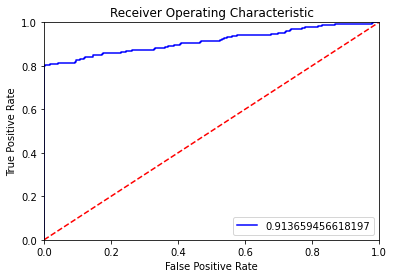

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [33]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8986437001393505
[0.00000000e+00 1.40252454e-04 1.00000000e+00]
[0.         0.79742765 1.        ]


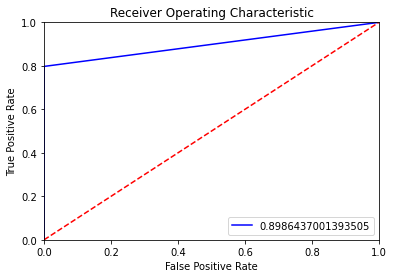

In [34]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
#decison tree

In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(x_train,y_train)
Y_pred=model_DecisionTree.predict(x_test)
print(Y_pred)

[0 0 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 69731 186949]
 [     1    310]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.27      0.43    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.27    256991
   macro avg       0.50      0.63      0.22    256991
weighted avg       1.00      0.27      0.43    256991

Accuracy of the model:  0.2725426182239845


In [ ]:
model_DecisionTree.score(x_train,y_train)

1.0

In [ ]:
print(list(zip(data.columns,model_DecisionTree.feature_importances_))) 

[('loan_amnt', 0.0012597415718226634), ('funded_amnt', 0.19053596486412433), ('funded_amnt_inv', 0.0056865395639092865), ('term', 5.522969741332835e-05), ('int_rate', 0.0009140819950107975), ('installment', 0.002351180615588995), ('grade', 0.00022444612442103343), ('emp_length', 0.0004766260271938612), ('home_ownership', 0.00016627201711347613), ('annual_inc', 0.0011632966558648042), ('verification_status', 0.00026860409474648597), ('purpose', 0.00022350395419695808), ('dti', 0.0017527692273749437), ('delinq_2yrs', 0.0002591132186677159), ('inq_last_6mths', 0.0004617574479623721), ('open_acc', 0.0005909287659283178), ('pub_rec', 0.0002114831315863113), ('revol_bal', 0.0017988465072162623), ('revol_util', 0.0014409460461009807), ('total_acc', 0.0009153329097353908), ('initial_list_status', 0.00016153966293646558), ('out_prncp', 0.027734782765321597), ('out_prncp_inv', 0.0023307213651280827), ('total_pymnt', 0.0018530277058583303), ('total_pymnt_inv', 0.002470500205710968), ('total_rec_p

In [ ]:
#predicting using the Bagging_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(n_estimators=10,random_state=10)
#fit the model on the data and predict the values
model=model.fit(x_train,y_train)

Y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[141062 115618]
 [    14    297]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    256680
           1       0.00      0.95      0.01       311

    accuracy                           0.55    256991
   macro avg       0.50      0.75      0.36    256991
weighted avg       1.00      0.55      0.71    256991

Accuracy of the model:  0.55005428205657


In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=101, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(x_train,y_train)

Y_pred=model_RandomForest.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 98369 158311]
 [     1    310]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.38      0.55    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.38    256991
   macro avg       0.50      0.69      0.28    256991
weighted avg       1.00      0.38      0.55    256991

Accuracy of the model:  0.3839784272600986


In [ ]:
#Adaboost classifier

In [ ]:
#predicting using the AdaBoost_Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(x_train,y_train)
Y_pred=model_AdaBoost.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 70273 186407]
 [     1    310]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.27      0.43    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.27    256991
   macro avg       0.50      0.64      0.22    256991
weighted avg       1.00      0.27      0.43    256991

Accuracy of the model:  0.274651641497173


## Gradient Boosting Classifier

In [9]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(x_train,y_train)

Y_pred=model_GradientBoosting.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(y_test,Y_pred))
print()
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[160685  95995]
 [     5    306]]

Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.63      0.77    256680
           1       0.00      0.98      0.01       311

    accuracy                           0.63    256991
   macro avg       0.50      0.80      0.39    256991
weighted avg       1.00      0.63      0.77    256991


Accuracy of the model:  0.6264460623134662


# XGBOOST

In [10]:
from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(x_train,y_train)

Y_pred=model_GradientBoosting.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test,Y_pred))
print(accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[ 94264 162416]
 [     3    308]]
0.3679973228634466
              precision    recall  f1-score   support

           0       1.00      0.37      0.54    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.37    256991
   macro avg       0.50      0.68      0.27    256991
weighted avg       1.00      0.37      0.54    256991



In [ ]:
#Using Deep Learning

In [ ]:
# Importing the keras libraries and package

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set

classifier.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
5990/5990 [==============================] - 14s 2ms/step - loss: 0.0831 - accuracy: 0.9799
Epoch 2/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0163 - accuracy: 0.9971
Epoch 3/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0158 - accuracy: 0.9972
Epoch 4/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0154 - accuracy: 0.9973
Epoch 5/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0157 - accuracy: 0.9973
Epoch 6/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0151 - accuracy: 0.9974
Epoch 7/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0150 - accuracy: 0.9974
Epoch 8/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0148 - accuracy: 0.9974
Epoch 9/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0147 - accuracy: 0.9975
Epoch 10/10
5990/5990 [==============================] - 12s 2ms/step - l

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred.round())

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.80      0.88       311

    accuracy                           1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997431816678405


In [ ]:
#ANN using MLP classifier

In [69]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=100, early_stopping=True,n_iter_no_change=5,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True)
mlp.fit(x_train,y_train)
Y_pred = mlp.predict(x_test)

Iteration 1, loss = 0.02503135
Validation score: 0.996728
Iteration 2, loss = 0.01790696
Validation score: 0.996945
Iteration 3, loss = 0.01714551
Validation score: 0.996995
Iteration 4, loss = 0.01647656
Validation score: 0.996795
Iteration 5, loss = 0.01611265
Validation score: 0.996945
Iteration 6, loss = 0.01589109
Validation score: 0.997179
Iteration 7, loss = 0.01495077
Validation score: 0.997679
Iteration 8, loss = 0.01473962
Validation score: 0.997629
Iteration 9, loss = 0.01468406
Validation score: 0.997379
Iteration 10, loss = 0.01465055
Validation score: 0.997429
Iteration 11, loss = 0.01459293
Validation score: 0.997746
Iteration 12, loss = 0.01434925
Validation score: 0.997496
Iteration 13, loss = 0.01423137
Validation score: 0.997579
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[202434  54246]
 [    25    286]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    256680
           1       0.01      0.92      0.01       311

    accuracy                           0.79    256991
   macro avg       0.50      0.85      0.45    256991
weighted avg       1.00      0.79      0.88    256991

Accuracy of the model:  0.7888213984147304


# Ensemble models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = GradientBoostingClassifier(random_state=10)
estimators.append(('cart', model2))
model3 = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=100, early_stopping=True,n_iter_no_change=5,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True)
estimators.append(('mlp', model3))
print(estimators)

[('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('cart', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
    

In [ ]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train,y_train)
Y_pred=ensemble.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Iteration 1, loss = inf
Validation score: 0.996728
Iteration 2, loss = 0.01779748
Validation score: 0.997028
Iteration 3, loss = 0.01718673
Validation score: 0.996828
Iteration 4, loss = 0.01673895
Validation score: 0.997396
Iteration 5, loss = 0.01611921
Validation score: 0.997529
Iteration 6, loss = 0.01575627
Validation score: 0.997479
Iteration 7, loss = 0.01539023
Validation score: 0.997646
Iteration 8, loss = 0.01521420
Validation score: 0.997512
Iteration 9, loss = 0.01512487
Validation score: 0.997128
Iteration 10, loss = 0.01477530
Validation score: 0.997563
Iteration 11, loss = 0.01462882
Validation score: 0.997646
Iteration 12, loss = 0.01474272
Validation score: 0.997696
Iteration 13, loss = 0.01444421
Validation score: 0.997546
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[205600  51080]
 [    24    287]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    256680
           1       0.01      0.92      0.01       311

    accuracy                           0.80    256991
   macro avg       0.50      0.86      0.45    256991
weighted avg       1.00      0.80      0.89    256991

Accuracy of the model:  0.8011447871715351


## Feature Selection

In [12]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.00598091, 0.00621441, 0.00603257, 0.01086409, 0.02545912,
       0.01399776, 0.03294845, 0.03392725, 0.02356284, 0.00345456,
       0.04041978, 0.01019333, 0.00046553, 0.00208612, 0.01640932,
       0.00641548, 0.00226149, 0.00071767, 0.00097862, 0.00288932,
       0.02460016, 0.06427154, 0.06401027, 0.03133795, 0.03007238,
       0.07840928, 0.01367399, 0.00725957, 0.11606998, 0.1093613 ,
       0.04658873, 0.00033063, 0.00041369, 0.00515706, 0.00624831])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

recoveries                    0.116070
collection_recovery_fee       0.109361
total_rec_prncp               0.078409
out_prncp                     0.064272
out_prncp_inv                 0.064010
last_pymnt_amnt               0.046589
verification_status           0.040420
emp_length                    0.033927
grade                         0.032948
total_pymnt                   0.031338
total_pymnt_inv               0.030072
int_rate                      0.025459
initial_list_status           0.024600
home_ownership                0.023563
inq_last_6mths                0.016409
installment                   0.013998
total_rec_int                 0.013674
term                          0.010864
purpose                       0.010193
total_rec_late_fee            0.007260
open_acc                      0.006415
total_rev_hi_lim              0.006248
funded_amnt                   0.006214
funded_amnt_inv               0.006033
loan_amnt                     0.005981
tot_cur_bal              

<AxesSubplot:>

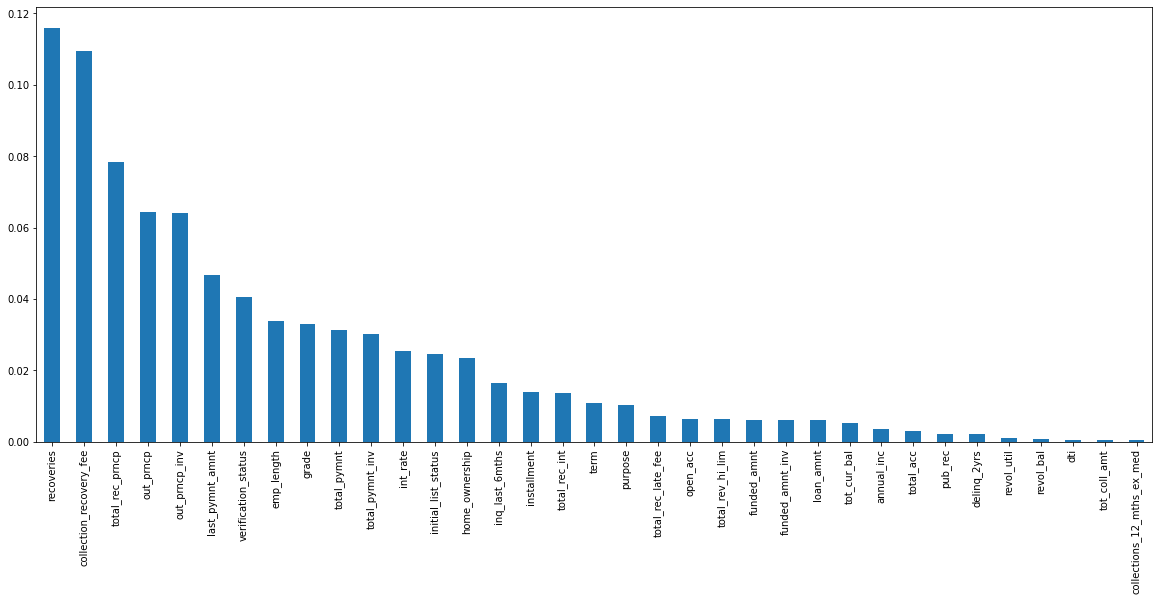

In [14]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [15]:
from sklearn.feature_selection import SelectKBest

In [17]:
#Now we Will select the  top 25 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'inq_last_6mths', 'open_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'total_rev_hi_lim'],
      dtype='object')

In [18]:
x_cols = [['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'inq_last_6mths', 'open_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'total_rev_hi_lim']]
y_cols = [['default_ind']]

In [26]:
data = pd.read_csv(r'final_cleaned_data.csv',usecols= ['period','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'inq_last_6mths', 'open_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'total_rev_hi_lim','default_ind'],index_col = 0,header = 0)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,7500.0,800.0,0,13.75,255.43,4,0,2,2,...,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,23800.0,0
200707,5000.0,5000.0,4150.0,0,7.43,155.38,0,8,0,2,...,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,23800.0,0
200707,5750.0,5750.0,3675.0,0,7.43,178.69,0,10,0,2,...,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,23800.0,0
200707,5000.0,5000.0,3975.0,0,7.43,155.38,0,6,1,2,...,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,23800.0,0
200707,1200.0,1200.0,0.0,0,11.54,39.60,2,0,1,2,...,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,23800.0,0


In [27]:
train_data = data.loc['200706':'201505',:]
train_data.shape

(598978, 26)

In [28]:
test_data = data.loc['201506':'201512',:]
test_data.shape

(256991, 26)

In [29]:
x_train = pd.DataFrame(train_data.values[:,:-1],columns=x_cols)

In [30]:
y_train = pd.DataFrame(train_data.values[:,-1],columns=y_cols)

In [31]:
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)

In [32]:
y_test = pd.DataFrame(test_data.values[:,-1],columns=y_cols)

In [ ]:
### splitting into training and testing
#x_train=train_data.iloc[:,:-1]
#y_train = train_data.iloc[:,-1]
#x_test = test_data.iloc[:,:-1]
#y_test = test_data.iloc[:,-1]

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = pd.DataFrame(sc.fit_transform(x_train),columns=x_cols)
x_test = pd.DataFrame(sc.transform(x_test),columns=x_cols)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(x_train,y_train)

Y_pred=model_GradientBoosting.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(y_test,Y_pred))
print()
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[126653 130027]
 [     3    308]]

Classification report: 

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66    256680
         1.0       0.00      0.99      0.00       311

    accuracy                           0.49    256991
   macro avg       0.50      0.74      0.33    256991
weighted avg       1.00      0.49      0.66    256991


Accuracy of the model:  0.4940289737772918


## handling imbalance dataset

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
x_resample, y_resample = SMOTE().fit_sample(x_train,y_train)

In [38]:
x_resample

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,total_rev_hi_lim
0,-0.844559,-0.843203,-1.640620,-0.634014,0.052412,-0.737495,1.682281,-1.698028,2.149639,1.286434,...,-0.811236,-0.108522,-1.121129,-0.033334,-0.255238,-0.103534,-0.136873,-0.094862,-0.474069,-0.188879
1,-1.144446,-1.143412,-1.238829,-0.634014,-1.393496,-1.149406,-1.365338,0.492187,-0.900245,1.286434,...,-0.811236,-0.605437,-0.710525,-0.394434,-0.924911,-0.103534,-0.136873,-0.094862,0.292991,-0.188879
2,-1.054480,-1.053349,-1.295800,-0.634014,-1.393496,-1.053437,-1.365338,1.039741,-0.900245,1.286434,...,-0.811236,-0.451285,-0.734114,-0.286104,-0.705917,-0.103534,-0.136873,-0.094862,-0.520722,-0.188879
3,-1.144446,-1.143412,-1.259819,-0.634014,-1.393496,-1.149406,-1.365338,-0.055367,0.624697,1.286434,...,-0.811236,-0.553627,-0.691671,-0.394434,-0.740312,-0.103534,-0.136873,-0.094862,-0.492212,-0.188879
4,-1.600275,-1.599730,-1.736569,-0.634014,-0.453198,-1.626078,0.158472,-1.698028,0.624697,1.286434,...,-0.811236,-1.068736,-1.242635,-0.943307,-0.902366,-0.103534,-0.136873,-0.094862,-0.514292,-0.188879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105639,1.228387,1.231971,1.211970,-0.634014,0.726824,1.833782,0.920377,-1.344329,0.624697,0.413280,...,-0.811236,-0.541420,-0.545055,-0.704495,-0.274878,-0.103534,2.281936,0.063338,-0.358593,-0.188879
1105640,0.552744,0.555602,0.547385,1.577252,0.767124,0.163822,0.158472,-0.497143,-0.900245,0.053295,...,-0.811236,0.429614,0.426486,-0.082491,1.811031,-0.103534,-0.132331,-0.089477,-0.433730,0.083936
1105641,0.279740,0.282304,0.287095,-0.634014,0.172191,0.597062,0.158472,-1.150474,2.149639,0.053295,...,-0.811236,-0.304899,-0.300230,-0.637401,0.052367,-0.103534,3.719162,4.477240,-0.480088,-0.129271
1105642,0.586155,0.589049,0.593466,-0.634014,-0.043393,0.918015,-0.089916,0.486172,2.149639,0.053295,...,-0.811236,-0.568028,-0.564035,-0.569527,-0.257838,-0.103534,-0.136873,-0.094862,-0.399797,-0.050623


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


#fit the model on the data and predict the values
model_GradientBoosting.fit(x_resample,y_resample)

Y_pred=model_GradientBoosting.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(y_test,Y_pred))
print()
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[165152  91528]
 [    12    299]]

Classification report: 

              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78    256680
         1.0       0.00      0.96      0.01       311

    accuracy                           0.64    256991
   macro avg       0.50      0.80      0.39    256991
weighted avg       1.00      0.64      0.78    256991


Accuracy of the model:  0.6438007556684865


In [41]:
from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(x_resample,y_resample)

Y_pred=model_GradientBoosting.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")
print()
print(classification_report(y_test,Y_pred))
print()
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 88670 168010]
 [     3    308]]

Classification report: 

              precision    recall  f1-score   support

         0.0       1.00      0.35      0.51    256680
         1.0       0.00      0.99      0.00       311

    accuracy                           0.35    256991
   macro avg       0.50      0.67      0.26    256991
weighted avg       1.00      0.35      0.51    256991


Accuracy of the model:  0.34623002361950417


In [ ]:
#Handling imbalance dataset using Upsampling technique

In [ ]:
#pip install imblearn
#pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
x_train1, y_train1 = SMOTE().fit_sample(x_train,y_train)

In [ ]:
train_data.default_ind.value_counts()

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = train_data[train_data.default_ind==0]
df_minority = train_data[train_data.default_ind==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=552822,    # to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.default_ind.value_counts()


In [ ]:
X_train = df_upsampled.values[:,:-1]
Y_train = df_upsampled.values[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
#predicting using the AdaBoost_Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

## Trying out new feature selection to decrease the type-1 error

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
#Feature Selection
# Out of 73 , few variables are not helpful or impactful in order to build a predictive model, hence dropping the varaible
#Based on the basis of droping the variables on more than 50% criteria and droping based on the feature importance
#technique droping the insignificant variables on basis of domain knowledge.

data.drop(['id','member_id','funded_amnt_inv','grade','emp_title','pymnt_plan','desc','title','addr_state',
            'inq_last_6mths','mths_since_last_record','initial_list_status','mths_since_last_major_derog','policy_code',
            'dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m'
            ,'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
            'max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','annual_inc_joint'],axis=1,inplace=True)

data.shape #(855969, 40)


(855969, 40)

In [11]:
#Again checking for missing value
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)  # capturing the highest missing variable total in desc order
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)  # calculating percentage of NAs
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']) # concatenating total and percent variables
    return(missing_data.head(50))

missing_data(data)

,Total,Percent
mths_since_last_delinq,439812,51.381767
next_pymnt_d,252971,29.553757
total_rev_hi_lim,67313,7.863953
emp_length,43061,5.030673
last_pymnt_d,8862,1.035318
revol_util,446,0.052105
collections_12_mths_ex_med,56,0.006542
last_credit_pull_d,50,0.005841
verification_status,0,0.000000
delinq_2yrs,0,0.000000


In [12]:
data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [13]:
# Imputing missing data for categorical variable with mode value

colname1=['term','emp_length','verification_status','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d']
for x in colname1[:]:
     data[x].fillna(data[x].mode()[0],inplace=True)
    
data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [14]:
# Imputing missing data for Numerical with mean value / Zeros 
#data['annual_inc_joint'].fillna(0,inplace=True)

colname2=['mths_since_last_delinq','revol_util','collections_12_mths_ex_med',
          'total_rev_hi_lim']
for x in colname2[:]:
    data[x].fillna(data[x].mean(),inplace=True)
    
data.isnull().sum()
data.shape   

(855969, 40)

In [15]:
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
zip_code                      0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

In [16]:
# Label Encoding - to label all categorical variable value with numeric value
#Label will get assigned in Ascending alphabetical of variable value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d','application_type']

data.head()
from sklearn import preprocessing

le={}

for x in colname1:
     le[x]=preprocessing.LabelEncoder()

for x in colname1:
     data[x]=le[x].fit_transform(data[x])
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,Dec-2011,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,Dec-2011,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,Dec-2011,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,Dec-2011,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,Dec-2011,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526,0


In [17]:
#Train and Test split

# issue_d is object datatype to make use for split converting issue_d in Date

data.issue_d = pd.to_datetime(data.issue_d)   #%y-%m-%d
col_name = 'issue_d'
print (data[col_name].dtype)

#split data in train and test

split_date = "2015-05-01"

train = data.loc[data['issue_d'] <= split_date]
train=train.drop(['issue_d'],axis=1)
#train.head()
train.shape    #(598978, 39)

test = data.loc[data['issue_d'] > split_date]
test=test.drop(['issue_d'],axis=1)
#test.head()
test.shape  #(256991, 39)

datetime64[ns]


(256991, 39)

In [18]:
train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526,0


In [19]:
test.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
452272,25000.0,25000.0,0,5.32,752.87,0,0,1,150000.0,0,1,46,9.54,0.0,208,34.149943,7.0,0.0,19339.0,42.5,18.0,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,40,701.14,0,41,0.0,0,0.0,45500.0,0
452273,18000.0,18000.0,1,19.48,471.70,21,7,5,150000.0,0,2,850,9.39,0.0,398,34.149943,18.0,1.0,14052.0,40.7,27.0,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,40,335.34,0,41,0.0,0,0.0,34500.0,0
452274,7000.0,7000.0,0,7.49,217.72,3,1,1,59000.0,0,1,201,13.06,1.0,623,23.000000,10.0,0.0,10467.0,24.2,34.0,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,43200.0,0
452275,20000.0,20000.0,0,17.97,722.75,18,7,1,180000.0,0,2,728,25.10,0.0,31,34.149943,13.0,0.0,59126.0,92.1,30.0,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,64200.0,0
452276,15000.0,15000.0,0,6.99,463.09,2,2,1,93000.0,0,1,12,14.86,0.0,620,34.149943,8.0,0.0,14914.0,43.2,17.0,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,34500.0,0


In [20]:
#selecting X and Y

X_train=train.values[:,:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)
print(Y_train)

X_test=test.values[:,:-1]
Y_test=test.values[:,-1]
Y_test=Y_test.astype(int)
print(Y_test)

[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [21]:
#all reg modules are included in sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#create a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)
#predicting on Test data
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256646     34]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.88      0.80      0.84       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9996225548754626


In [23]:
#tunnig the model

In [24]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[9.99831423e-01 1.68577195e-04]
 [9.99852534e-01 1.47465755e-04]
 [9.84208449e-01 1.57915507e-02]
 ...
 [9.99926118e-01 7.38823255e-05]
 [9.99894921e-01 1.05078664e-04]
 [9.99977329e-01 2.26706047e-05]]


In [25]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256646     34]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.88      0.80      0.84       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9996225548754626


In [27]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    print("Errors at threshold ", a, ":",total_err, " , type 2 => ", 
        cfm[1,0]," , type 1 => ", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 =>  0  , type 1 =>  256680
Errors at threshold  0.01 : 56464  , type 2 =>  45  , type 1 =>  56419
Errors at threshold  0.02 : 28373  , type 2 =>  56  , type 1 =>  28317
Errors at threshold  0.03 : 16406  , type 2 =>  59  , type 1 =>  16347
Errors at threshold  0.04 : 10250  , type 2 =>  60  , type 1 =>  10190
Errors at threshold  0.05 : 6735  , type 2 =>  61  , type 1 =>  6674
Errors at threshold  0.06 : 4620  , type 2 =>  61  , type 1 =>  4559
Errors at threshold  0.07 : 3251  , type 2 =>  62  , type 1 =>  3189
Errors at threshold  0.08 : 2321  , type 2 =>  62  , type 1 =>  2259
Errors at threshold  0.09 : 1675  , type 2 =>  62  , type 1 =>  1613
Errors at threshold  0.1 : 1251  , type 2 =>  62  , type 1 =>  1189
Errors at threshold  0.11 : 930  , type 2 =>  62  , type 1 =>  868
Errors at threshold  0.12 : 715  , type 2 =>  63  , type 1 =>  652
Errors at threshold  0.13 : 557  , type 2 =>  63  , type 1 =>  494
Errors at threshold  0.14 : 441

# Decision_Tree_Classifier

In [28]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[250722   5958]
 [     9    302]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Accuracy of the model:  0.9767812880606714


# Gradient_Boosting_Classifier

In [30]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256625     55]
 [    10    301]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.97      0.90       311

    accuracy                           1.00    256991
   macro avg       0.92      0.98      0.95    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9997470728546914


# ExtraTreesClassifier

In [32]:
#predicting using the Bagging_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(n_estimators=10,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[250534   6146]
 [    11    300]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.96      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Accuracy of the model:  0.9760419625590001


## Random Forest Classifier

In [34]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=101, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[188803  67877]
 [     2    309]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    256680
           1       0.00      0.99      0.01       311

    accuracy                           0.74    256991
   macro avg       0.50      0.86      0.43    256991
weighted avg       1.00      0.74      0.85    256991

Accuracy of the model:  0.7358701277476644


# ANN Using MLP Classifier

In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=100, early_stopping=True,n_iter_no_change=5,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)

Iteration 1, loss = inf
Validation score: 0.994006
Iteration 2, loss = inf
Validation score: 0.994825
Iteration 3, loss = inf
Validation score: 0.922969
Iteration 4, loss = 0.27222285
Validation score: 0.923019
Iteration 5, loss = 0.27102018
Validation score: 0.922936
Iteration 6, loss = inf
Validation score: 0.922936
Iteration 7, loss = 0.27212339
Validation score: 0.922936
Iteration 8, loss = 0.27210126
Validation score: 0.922919
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256547    133]
 [    64    247]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.65      0.79      0.71       311

    accuracy                           1.00    256991
   macro avg       0.82      0.90      0.86    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9992334361903724


## Ensemble model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [59]:
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = GradientBoostingClassifier(random_state=10)
estimators.append(('cart', model3))
model3 = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=100, early_stopping=True,n_iter_no_change=5,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True)
estimators.append(('mlp', model3))
print(estimators)

[('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('cart', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
    

In [60]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Iteration 1, loss = inf
Validation score: 0.994006
Iteration 2, loss = inf
Validation score: 0.994825
Iteration 3, loss = inf
Validation score: 0.922969
Iteration 4, loss = 0.27222285
Validation score: 0.923019
Iteration 5, loss = 0.27102018
Validation score: 0.922936
Iteration 6, loss = inf
Validation score: 0.922936
Iteration 7, loss = 0.27212339
Validation score: 0.922936
Iteration 8, loss = 0.27210126
Validation score: 0.922919
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256619     61]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.80      0.80      0.80       311

    accuracy                           1.00    256991
   macro avg       0.90      0.90      0.90    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9995174928304882


# ANN

In [42]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 38))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

'''# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))'''


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [44]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [45]:
# Fitting the ANN to the Training set

classifier.fit(X_train,Y_train, batch_size = 100, epochs = 10)

Epoch 1/10
5990/5990 [==============================] - 14s 2ms/step - loss: 0.0451 - accuracy: 0.9906
Epoch 2/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0229 - accuracy: 0.9962
Epoch 3/10
5990/5990 [==============================] - 11s 2ms/step - loss: 0.0214 - accuracy: 0.9966
Epoch 4/10
5990/5990 [==============================] - 11s 2ms/step - loss: 0.0214 - accuracy: 0.9965
Epoch 5/10
5990/5990 [==============================] - 14s 2ms/step - loss: 0.0199 - accuracy: 0.9968
Epoch 6/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0183 - accuracy: 0.9970
Epoch 7/10
5990/5990 [==============================] - 12s 2ms/step - loss: 0.0175 - accuracy: 0.9972
Epoch 8/10
5990/5990 [==============================] - 11s 2ms/step - loss: 0.0170 - accuracy: 0.9973
Epoch 9/10
5990/5990 [==============================] - 11s 2ms/step - loss: 0.0226 - accuracy: 0.9962
Epoch 10/10
5990/5990 [==============================] - 12s 2ms/step - l

In [46]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [82]:
Y_pred

array([[0.00214252],
       [0.00214252],
       [0.00214252],
       ...,
       [0.00214252],
       [0.00214252],
       [0.00214252]], dtype=float32)

In [48]:
Y_pred = (Y_pred > 0.5)

In [49]:
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256676      4]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.98      0.80      0.88       311

    accuracy                           1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9997392904809896


# FINAL MODEL

# Gradient Boosting Classifier

In [51]:
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,2011-12-01,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,2011-12-01,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,2011-12-01,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,2011-12-01,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,2011-12-01,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526,0


In [52]:
data = data.drop('issue_d', axis=1)

In [53]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [54]:
x.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526


In [55]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [56]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=10)

# Prediction on Full data set

In [57]:
#Predicting on dataset using gradient boosting technique
Y_full_pred=model_GradientBoosting.predict(x)

In [58]:
Y_full_pred

array([0, 1, 0, ..., 0, 0, 0])

In [59]:
x.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526


In [60]:
#creating and empty dataframe
final_df = pd.DataFrame()

In [61]:
#concatinating the x and y values in the created empty dataset
final_df = pd.concat([x,y],axis=1)

In [62]:
final_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526,0


In [63]:
#creating new variable for predicted inputs on current cleaned dataset
final_df['Predicted_class']=Y_full_pred

In [64]:
final_df.shape

(855969, 40)

In [65]:
#checking the final data set 
final_df.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,total_rev_hi_lim,default_ind,Predicted_class
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,32163.574526,0,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,32163.574526,1,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,32163.574526,0,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,32163.574526,0,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,32163.574526,0,0
5,5000.0,5000.0,0,7.90,156.46,3,3,5,36000.0,1,13,798,11.20,0.0,573,34.149943,9.0,0.0,7963.0,28.3,12.0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,39,161.03,0,101,0.0,0,0.0,32163.574526,0,0
6,7000.0,7000.0,1,15.96,170.08,14,8,5,47004.0,0,2,266,23.51,0.0,340,34.149943,7.0,0.0,17726.0,85.6,11.0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,40,170.08,0,41,0.0,0,0.0,32163.574526,0,0
7,3000.0,3000.0,0,18.64,109.43,20,9,5,48000.0,1,0,834,5.35,0.0,285,34.149943,4.0,0.0,8221.0,87.5,4.0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,39,111.34,0,23,0.0,0,0.0,32163.574526,0,0
8,5600.0,5600.0,1,21.28,152.39,26,4,4,40000.0,1,11,892,5.55,0.0,46,34.149943,11.0,0.0,5210.0,32.6,13.0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,4,152.39,0,12,0.0,0,0.0,32163.574526,1,1
9,5375.0,5375.0,1,12.69,121.45,9,10,5,15000.0,2,9,724,18.08,0.0,688,34.149943,2.0,0.0,9279.0,36.5,3.0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,77,121.45,0,65,0.0,0,0.0,32163.574526,1,1


In [66]:
#showing prediction on uncleaned data
#0--> Non defaulter
#1--> Defaulter

In [67]:
Actual_data=pd.read_csv(r'XYZCorp_LendingData.txt', sep = '\t',low_memory=False)
Actual_data["Loan_predictions"]=Y_full_pred
Actual_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind,Loan_predictions
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.

In [68]:
Actual_data["Loan_predictions"]=Actual_data["Loan_predictions"].map({0:"Non-Defaulter", 1:"Defaulter"})

In [69]:
Actual_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind,Loan_predictions
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non-Defaulter
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Defaulter
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non-Defaulter
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non-Defaulter
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non-Defaulter
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non-Defaulter
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,N

In [70]:
Actual_data.Loan_predictions.value_counts()

Non-Defaulter    810667
Defaulter         45302
Name: Loan_predictions, dtype: int64

In [71]:
final_df.Predicted_class.value_counts()

0    810667
1     45302
Name: Predicted_class, dtype: int64

# Export the final data-frame to Root Directory

In [74]:
final_df.to_csv(r'final_data_with_prediction.csv')

In [75]:
#Actual_data.to_excel("Loan_predictions.xlsx")
Actual_data.to_csv('Loan_predictions.csv')

In [81]:
import pickle
#it is used to save file permantnently for application use

In [83]:
#save the model to disk
filename = "model_GradientBoosting.sav"
filepath = r'C:\Python\model_GradientBoosting.pckl'
pickle.dump(model_GradientBoosting,open(filename, "wb")) 